In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv("calories.csv")
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [3]:
df.isnull().sum()


User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [4]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Height'].fillna(df['Height'].median(), inplace=True)
df['Weight'].fillna(df['Weight'].median(), inplace=True)
df['Duration'].fillna(df['Duration'].median(), inplace=True)
df['Heart_Rate'].fillna(df['Heart_Rate'].median(), inplace=True)
df['Body_Temp'].fillna(df['Body_Temp'].median(), inplace=True)
df['Calories'].fillna(df['Calories'].median(), inplace=True)


C:\Users\taskeen firdose\AppData\Local\Temp\ipykernel_19392\2719163936.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\taskeen firdose\AppData\Local\Temp\ipykernel_19392\2719163936.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [5]:
target = "Calories"
X = df.drop(columns=[target, "User_ID"])
y = df[target]


In [6]:
categorical_features = ["Gender"]
numeric_features = [col for col in X.columns if col not in categorical_features]


In [7]:
cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

num_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", cat_pipeline, categorical_features),
        ("num", num_pipeline, numeric_features)
    ]
)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


In [10]:
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [11]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

rmse, r2


(np.float64(11.488940149152882), 0.9672937151257295)

In [12]:
df.to_csv("cleaned_calories.csv", index=False)

In [13]:
# --- Inspect dataset (run this first) ---
print("Shape:", df.shape)
print("\nColumns:")
for c in df.columns:
    print(" -", c)

display(df.head(6))


Shape: (15000, 9)

Columns:
 - User_ID
 - Gender
 - Age
 - Height
 - Weight
 - Duration
 - Heart_Rate
 - Body_Temp
 - Calories


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0


In [14]:
# --- Find likely column names automatically ---
cols = [c.lower() for c in df.columns]

In [15]:
# heuristics to detect columns
calorie_candidates = [c for c in df.columns if "calor" in c.lower() or "kcal" in c.lower()]
duration_candidates = [c for c in df.columns if "dur" in c.lower() or "session" in c.lower() or "time" in c.lower()]
weight_candidates = [c for c in df.columns if "weight" in c.lower() or "wt" in c.lower() or "kg" in c.lower()]

print("Calorie candidates:", calorie_candidates)
print("Duration candidates:", duration_candidates)
print("Weight candidates:", weight_candidates)

Calorie candidates: ['Calories']
Duration candidates: ['Duration']
Weight candidates: ['Weight']


In [16]:
# pick defaults (fallback to None)
cal_col = calorie_candidates[0] if calorie_candidates else None
dur_col = duration_candidates[0] if duration_candidates else None
wt_col = weight_candidates[0] if weight_candidates else None

print("\nUsing columns:")
print("  calories ->", cal_col)
print("  duration ->", dur_col)
print("  weight   ->", wt_col)


Using columns:
  calories -> Calories
  duration -> Duration
  weight   -> Weight


In [17]:
# --- Plot: Calorie vs Duration ---
import matplotlib.pyplot as plt
import numpy as np

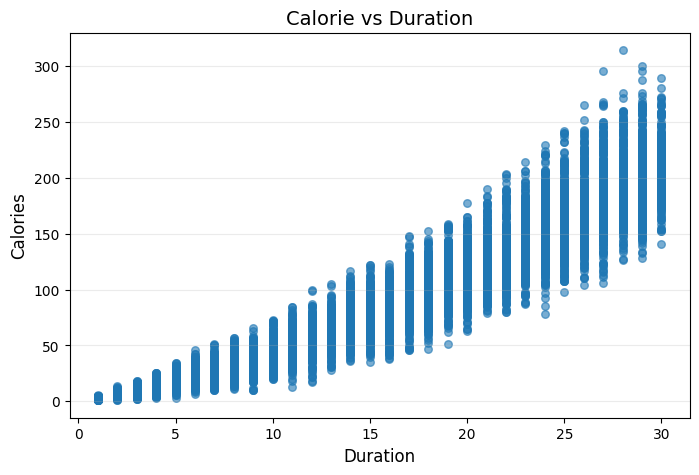

In [18]:
# make sure columns exist
assert cal_col is not None, "Set cal_col to your calories column name"
assert dur_col is not None, "Set dur_col to your duration column name"

x = df[dur_col].dropna()
y = df[cal_col].loc[x.index]  # match indices if there were NaNs

plt.figure(figsize=(8,5))
plt.scatter(x, y, s=30, alpha=0.6)
plt.xlabel(dur_col, fontsize=12)
plt.ylabel(cal_col, fontsize=12)
plt.title("Calorie vs Duration", fontsize=14)
plt.grid(axis='y', alpha=0.25)
plt.show()

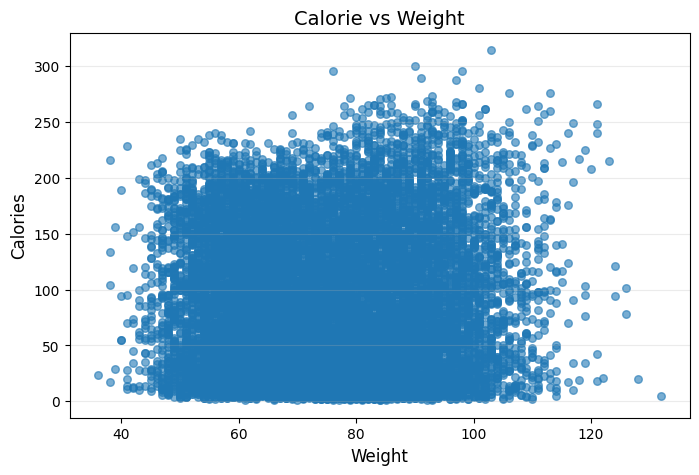

In [19]:
# --- Plot: Calorie vs Weight ---
if wt_col is None:
    print("No weight column detected — set wt_col manually to plot Calorie vs Weight.")
else:
    x = df[wt_col].dropna()
    y = df[cal_col].loc[x.index]

    plt.figure(figsize=(8,5))
    plt.scatter(x, y, s=30, alpha=0.6)
    plt.xlabel(wt_col, fontsize=12)
    plt.ylabel(cal_col, fontsize=12)
    plt.title("Calorie vs Weight", fontsize=14)
    plt.grid(axis='y', alpha=0.25)
    plt.show()


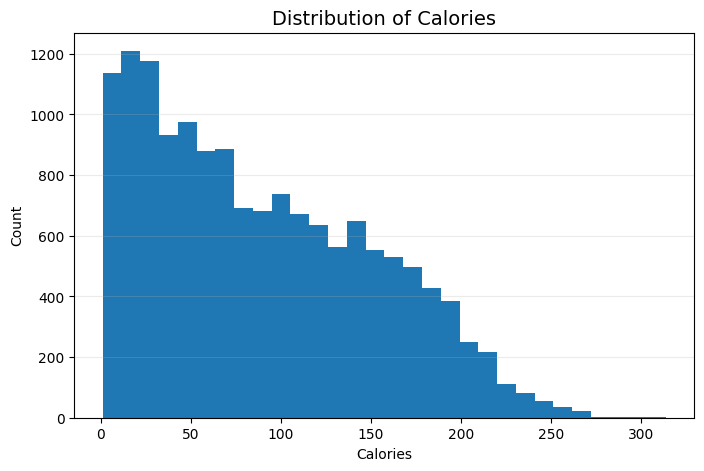

In [20]:
# --- Plot: Distribution of calories ---
vals = df[cal_col].dropna()

plt.figure(figsize=(8,5))
plt.hist(vals, bins=30)
plt.title("Distribution of Calories", fontsize=14)
plt.xlabel(cal_col)
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.25)
plt.show()


In [1]:
# Updated plots added today


In [2]:
# Update test
